# Exploratory Data Analysis

The main purpose of Exploratory Data Analysis is to help look at a dataset before making any assumptions. It is of great help to identify obvious errors, as well as better understand patterns within the data, detect outliers and find interesting relations among the variables.

Data scientists can use exploratory analysis to ensure the results they produce are valid and applicable to any desired business outcomes and goals. EDA also helps stakeholders by confirming they are asking the right questions. EDA can help answer questions about standard deviations, categorical variables, and confidence intervals. Once EDA is complete and insights are drawn, its features can then be used for more sophisticated data analysis or modeling, including machine learning.


##**STEP 1 :**  Importing important packages and datasets


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%load_ext google.colab.data_table

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Deadshot-07/IPL-EDA/T/matches.csv")
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [ ]:
df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


###There are total 18 columns:

* season: The IPL season
* city: The city where the IPL match was held.
* date: The date on which the match was held.
* team1: One of the teams of the IPL match
* team2: The other team of the IPL match
* toss_winner: The team that won the toss
* toss_decision: The decision taken by the team that won the toss to ‘bat’ or ‘field’
* result: The result(‘normal’, ‘tie’, ‘no result’) of the match.
* dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.
* winner: The winner of the match.
* win_by_runs: Provides the runs by which the team batting first won
* win_by_runs: Provides the number of wickets by which the team batting second won.
* player_of_match: The outstanding player of the match.
* venue: The venue where the match was hosted.
umpire1: One of the two on-field umpires who officiate the match.
umpire2: One of the two on-field umpires who officiate the match.
umpire3: The off-field umpire who officiates the match

In [ ]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

##**STEP 2 :** Data Preprocessing



In [ ]:
df[df['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [ ]:
df.drop (columns = ['umpire1','umpire2','umpire3'], inplace = True)

In [ ]:
df['city'].fillna(value = 'Dubai', inplace = True)

In [ ]:
## EDA

In [ ]:
df['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
df.drop (df[df['winner'].isnull()].index , inplace = True)

In [ ]:
df['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
df["team2"] = df["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["team1"]=df["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["winner"] = df["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df["toss_winner"] = df["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

##**STEP 3 :** Exploratory Data Analysis (matches dataset)

In [ ]:
df['winner'].count()
#total number of matches in our data set

752

In [ ]:
df.groupby(df['player_of_match'])['player_of_match'].count().sort_values(ascending=False).head(10)
#top 10 players with most man of the match awards. Chris Gayle seems to be the man with the most accolades

player_of_match
CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

In [ ]:
teams = df['team1'].append(df['team2'])
teams = pd.DataFrame(teams)
teams.columns = ['team']
count_match = teams.groupby(teams['team'])['team'].count()
count_match = pd.DataFrame(count_match)
count_match.columns = ['countplayed']
count_match.reset_index(inplace=True)
count_match.sort_values('countplayed',ascending = False, inplace= True)
count_match.set_index('team', inplace=True)

In [ ]:
count_match
#count of matches played by teams. As we can see, Mumbai Indians have played the maximum number of games in the IPL till 2019

,countplayed
team,
Mumbai Indians,187
Kolkata Knight Riders,178
Royal Challengers Bangalore,177
Kings XI Punjab,176
Chennai Super Kings,164
Delhi Daredevils,159
Rajasthan Royals,145
Sunrisers Hyderabad,108
Deccan Chargers,75


In [ ]:
winners = df.groupby('winner')['winner'].count()
winners = pd.DataFrame(winners)
winners.columns = ['number of wins']
winners.sort_values('number of wins', ascending= False, inplace = True)
winners.reset_index(inplace = True)
winners.columns = ['team','number of wins']
winners.set_index('team', inplace=True)

In [ ]:
winners
#count of matches won by teams. As we can see, Mumbai Indians have won the maximum number of games in the IPL till 2019. 

,number of wins
team,
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Royal Challengers Bangalore,84
Kings XI Punjab,82
Rajasthan Royals,75
Delhi Daredevils,67
Sunrisers Hyderabad,58
Deccan Chargers,29


In [ ]:
win_percent = (winners ['number of wins'] / count_match ['countplayed']) * 100
win_percent= pd.DataFrame(win_percent)
win_percent.columns = ['win percentage']
win_percent.sort_values('win percentage',ascending= False, inplace = True)
win_percent['games played'] = count_match ['countplayed']
win_percent
#getting a better idea about success of a team requires calculating the win percentage. 
#We can say that Chennai Super Kings is the most successful team considering the fact that Delhi have merely played 16 games

,win percentage,games played
team,,
Delhi Capitals,62.500000,16
Chennai Super Kings,60.975610,164
Mumbai Indians,58.288770,187
Sunrisers Hyderabad,53.703704,108
Rajasthan Royals,51.724138,145
Kolkata Knight Riders,51.685393,178
Rising Pune Supergiants,50.000000,30
Royal Challengers Bangalore,47.457627,177
Kings XI Punjab,46.590909,176


### Toss analysis


In [ ]:
toss = df.groupby(df['toss_winner']).toss_winner.count()
toss = pd.DataFrame(toss)
toss.columns = ['toss_win']
toss.sort_values('toss_win',ascending = False, inplace = True)
toss['percentage of toss win'] = (toss['toss_win']/ count_match ['countplayed']) * 100

toss
#Looks like Mumbai and Chennai teams are the most lucky when it comes to winning the toss

,toss_win,percentage of toss win
toss_winner,,
Mumbai Indians,98,52.406417
Kolkata Knight Riders,92,51.685393
Chennai Super Kings,89,54.268293
Kings XI Punjab,81,46.022727
Royal Challengers Bangalore,80,45.197740
Delhi Daredevils,79,49.685535
Rajasthan Royals,78,53.793103
Sunrisers Hyderabad,46,42.592593
Deccan Chargers,43,57.333333


In [ ]:
#we try to see if winning toss provides a better chance of winning match
tosswin = (df[df['toss_winner']==df['winner']].shape[0] / df.shape[0])*100

In [ ]:
tosswin
# we see that 52% of teams who won the toss also won the game. This shows that winning the toss gives and edge but it isn't necessarily that significant/ decisive

52.26063829787234

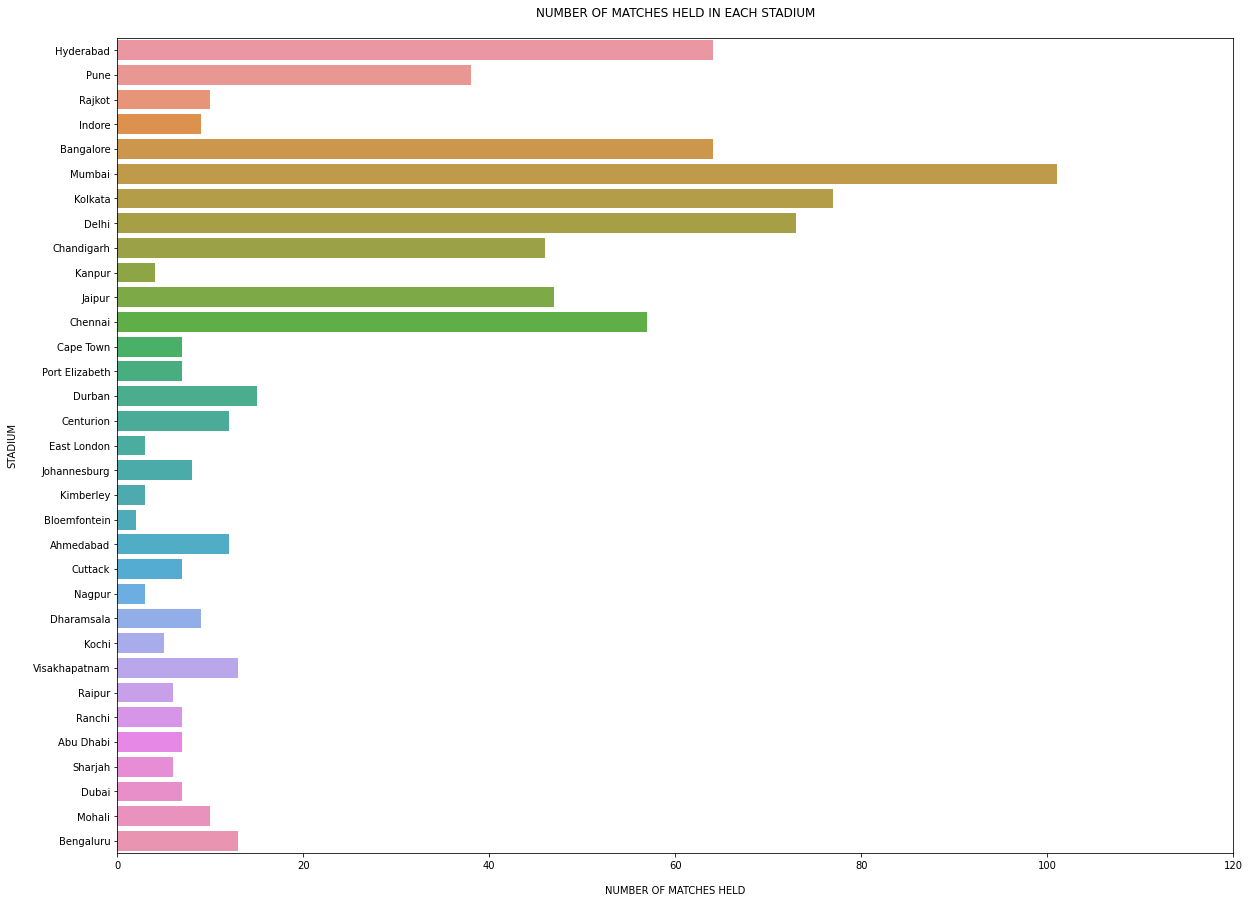

In [ ]:
sns.countplot(y='city', data=df)
plt.gcf().set_size_inches(20,15)
plt.title('NUMBER OF MATCHES HELD IN EACH STADIUM\n') 
plt.xlabel('\nNUMBER OF MATCHES HELD')  
plt.ylabel('STADIUM\n')
plt.xlim([0,120])
plt.show()

##**STEP 4 :** Exploratory Data Analysis (deliveries dataset)

In [ ]:
dft = pd.read_csv('https://raw.githubusercontent.com/Deadshot-07/IPL-EDA/T/deliveries.csv')
#deliveries gives ball by ball records

In [ ]:
dft.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
dft.shape

(179078, 21)

In [ ]:
dft.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

### From the observations till now we can understand the following things:
- **match_id** - id of match
- **inning** - 1st or 2nd
- **batting_team** - batting team
- **bowling_team** - bowling team
- **over** - over in the innings
- **ball** - ball number in the over
- **batsman** - name of batsman on strike
- **non_striker** - name of batsman at non-striker end
- **bowler** - name of bowler
- **is_super_over** - binary value 0 or 1(yes/no)
- **wide_runs** - how many runs consided by wide
- **bye_runs** - bye runs
- **legbye_runs** - leg bye runs
- **noball_runs** - no ball runs
- **penalty_runs** - penalty runs
- **batsman_runs** - batsman runs
- **total_runs** - total runs for the ball
- **player_dismissed** - name of the batsman dismissed
- **dismissal_kind** - how the bastman is dismissed(LBW/Hitwicket/runout ..etc)
- **fielder** - name of the fielder who catched the ball

### Batsman Performance Analysis

In [ ]:
#runs by each batsman
batsman_run = dft.groupby("batsman")["batsman_runs"].sum()
batsman_run_df = pd.DataFrame(columns = ["batsman","batsman_runs"])
for i in batsman_run.iteritems():
    temp_df = pd.DataFrame({"batsman":[i[0]],"batsman_runs":[i[1]]})
    batsman_run_df = batsman_run_df.append(temp_df,ignore_index = True)

# balls played by each batsman
balls = []
for j in batsman_run_df["batsman"]:
    balls.append(dft[dft.batsman == j].groupby("batsman")["ball"].count()[0])
batsman_run_df["balls"] = balls

#total matches payed by each batsman
matches_played = []
for i in batsman_run_df["batsman"]:
    matches_played.append((dft[dft.batsman == i].groupby("match_id")["match_id"].count()).size)
batsman_run_df["matches"] = matches_played

#Strike rate
batsman_run_df["strike_rate"] = (batsman_run_df["batsman_runs"] / batsman_run_df["balls"])*100

#average
batsman_run_df["average"] = batsman_run_df["batsman_runs"] / batsman_run_df["matches"]


In [ ]:
batsman_run_df = batsman_run_df.sort_values("batsman_runs",ascending = False).reset_index(drop = True)
batsman_run_df

,batsman,batsman_runs,balls,matches,strike_rate,average
0,V Kohli,5434,4211,169,129.043,32.1538
1,SK Raina,5415,4044,189,133.902,28.6508
2,RG Sharma,4914,3816,182,128.774,27
3,DA Warner,4741,3398,126,139.523,37.627
4,S Dhawan,4632,3776,158,122.669,29.3165
...,...,...,...,...,...,...
511,IC Pandey,0,2,1,0,0
512,J Denly,0,1,1,0,0
513,P Raj,0,1,1,0,0
514,Sunny Gupta,0,1,1,0,0


### Bowler Performance Analysis

In [ ]:
#bowler
bowler_summary = pd.DataFrame(columns = ["bowler"])
for i in dft["bowler"].unique():
    temp_df = pd.DataFrame({"bowler": [i]})
    bowler_summary = bowler_summary.append(temp_df,ignore_index = True)

#total balls 
balls = []
for i in bowler_summary["bowler"]:
    temp = dft[dft.bowler == i].groupby("bowler")["ball"].count()[0]
    balls.append(temp)
bowler_summary["balls"] = balls

#total wickets
wickets = []
for i in bowler_summary["bowler"]:
    temp = dft[dft.bowler==i].groupby("bowler")["player_dismissed"].count()[0]
    wickets.append(temp)
bowler_summary["wickets"] = wickets

#total Runs
runs = []
for i in bowler_summary["bowler"]:
    temp = dft[dft.bowler==i].groupby("bowler")["total_runs"].sum()[0]
    runs.append(temp)
bowler_summary["runs"] = runs

#economy
bowler_summary["economy"] = bowler_summary["runs"]/(bowler_summary["balls"]/6)

In [ ]:
bowler_summary = bowler_summary.sort_values("wickets",ignore_index = True,ascending = False)
bowler_summary

,bowler,balls,wickets,runs,economy
0,SL Malinga,2974,188,3511,7.083389
1,DJ Bravo,2711,168,3733,8.261896
2,A Mishra,3172,165,3850,7.282472
3,Harbhajan Singh,3451,161,4050,7.041437
4,PP Chawla,3157,156,4153,7.892936
...,...,...,...,...,...
400,Sunny Gupta,19,0,47,14.842105
401,K Upadhyay,56,0,81,8.678571
402,SPD Smith,2,0,5,15.000000
403,LRPL Taylor,13,0,24,11.076923


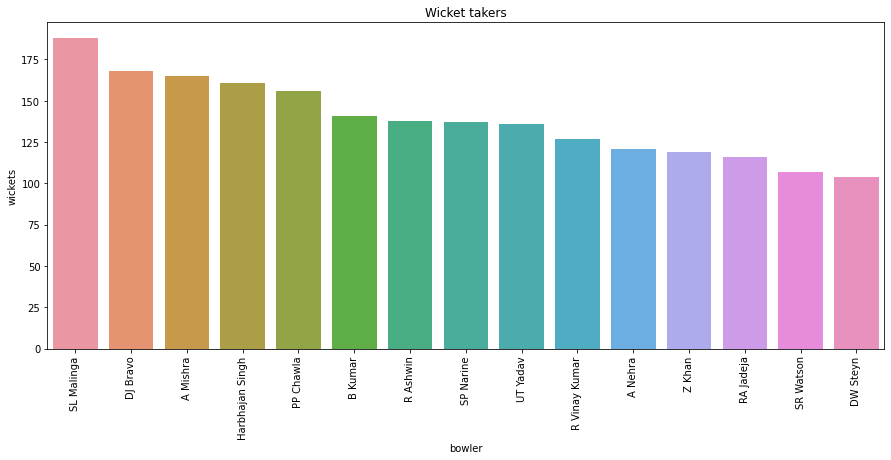

In [ ]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title('Wicket takers')
sns.barplot(x = "bowler",y = "wickets",data =bowler_summary.head(15) )

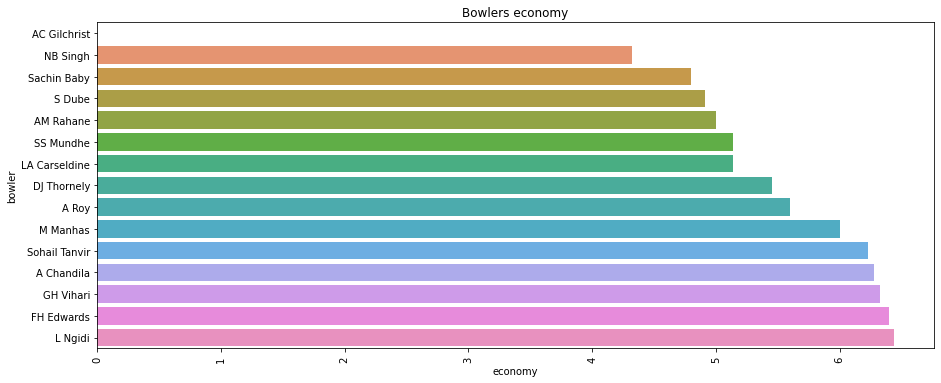

In [ ]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title("Bowlers economy")
sns.barplot(x = "economy",y = "bowler",data = bowler_summary.sort_values("economy",ignore_index = True,ascending = True).head(15))

### Miscellaneous Analysis

In [ ]:
Seasonal_runs_players = pd.DataFrame(columns=["batsman"])
Seasonal_runs_players["batsman"] = batsman_run_df.head(10)["batsman"]

for i in df["season"].unique():
    temp = []
    #print(i)
    dict = {}
    for n in batsman_run_df.head(10)["batsman"]:
        dict[n] = 0
    for j in df[df.season == i]["id"]:
        temp.append(j)
    for k in temp:
        temp1 = {}
        for l in dft[dft.match_id == k].groupby("batsman")["batsman_runs"]:
            temp1[l[0]] = l[1].sum()
        for m in temp1:
            try:
                dict[m] += temp1[m]
            except KeyError:
                True
    Seasonal_runs_players[str(i)] = dict.values()

#average runs
Seasonal_runs_players["average_runs"] = batsman_run_df.head(10)["batsman_runs"]/12
Seasonal_runs_players.columns
Seasonal_runs_players = Seasonal_runs_players[['batsman', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']]
Seasonal_runs_players.style

,batsman,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,V Kohli,165,246,307,557,364,639,359,503,973,308,539,447
1,SK Raina,421,434,528,438,441,548,523,374,399,442,466,401
2,RG Sharma,404,362,404,372,433,538,390,482,489,333,297,410
3,DA Warner,0,163,282,305,256,410,528,562,848,641,0,727
4,S Dhawan,340,40,191,400,569,311,377,353,501,479,529,542
5,CH Gayle,0,184,292,608,733,720,196,480,227,200,386,523
6,MS Dhoni,414,332,287,392,357,461,371,372,284,290,481,436
7,RV Uthappa,320,175,374,264,405,434,660,364,394,388,366,302
8,AB de Villiers,95,465,111,312,319,373,395,456,687,216,488,444
9,G Gambhir,534,286,277,378,590,406,335,327,501,498,91,0


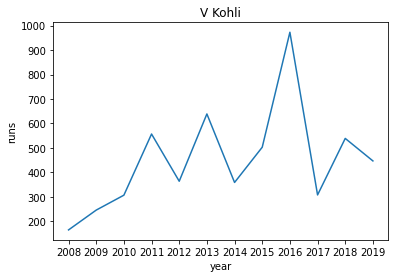

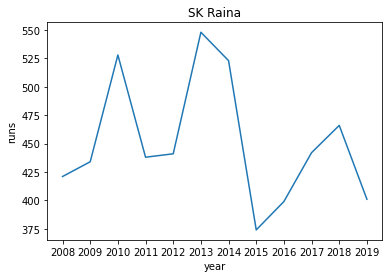

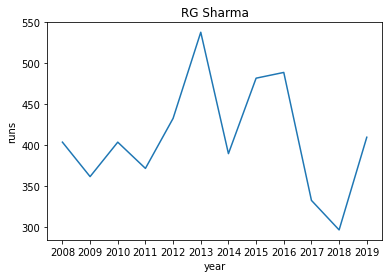

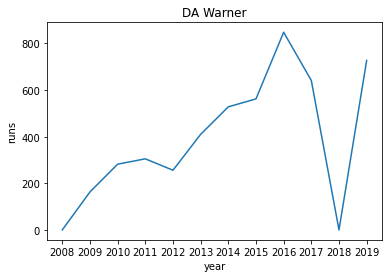

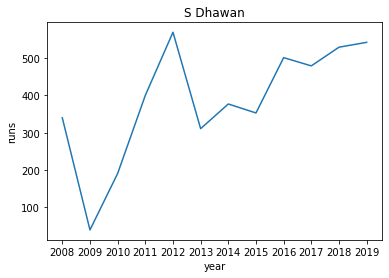

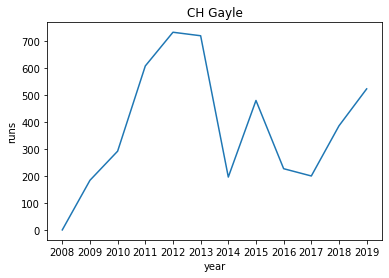

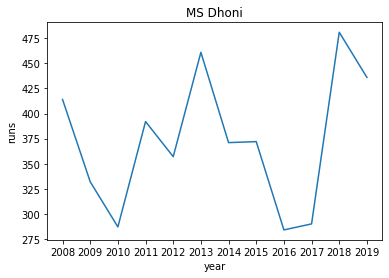

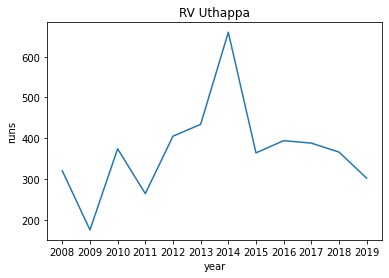

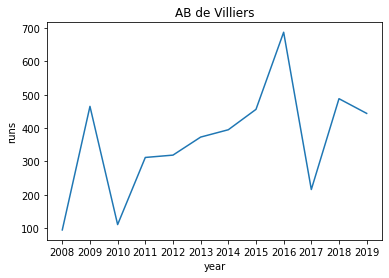

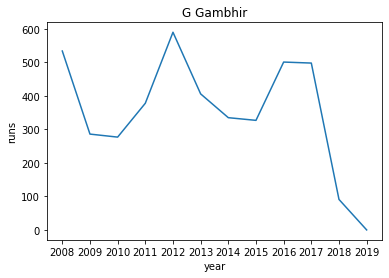

In [ ]:
year = []
for i in Seasonal_runs_players.iteritems():
    year.append(i[0])
Year = year[1:13]
for i in range(0,10):
    runs = []
    for j in Seasonal_runs_players.iteritems():
        runs.append(j[1][i])
    Runs = runs[1:13]
    plt.title(str(runs[0]))
    sns.lineplot(x = Year, y =Runs)
    #print(Year[1:13])
    #print(Runs)
    plt.xlabel("year")
    plt.ylabel("runs")
    plt.show()

In [ ]:
#maximum centuries
runs_series = dft.groupby([dft.match_id,dft.batsman]).total_runs.sum()
runs_df = pd.DataFrame(runs_series)
runs_df = runs_df.reset_index()
condition = runs_df.total_runs >= 100
player_100df = runs_df.loc[condition,:]
player_100df.groupby(player_100df.batsman).total_runs.count().sort_values(ascending=False).head(5)

batsman
CH Gayle     10
V Kohli       6
SR Watson     5
DA Warner     5
KL Rahul      3
Name: total_runs, dtype: int64

In [ ]:
#best fielder in terms of run out
condition1 = dft.dismissal_kind == 'run out'
df1 = dft.loc[condition1,:]
df1.groupby(df1.fielder).batsman.count().sort_values(ascending=False)

fielder
MS Dhoni      23
RA Jadeja     20
V Kohli       17
SK Raina      16
MK Pandey     14
              ..
PJ Cummins     1
S Randiv       1
S Narwal       1
LPC Silva      1
MV Boucher     1
Name: batsman, Length: 260, dtype: int64

In [ ]:
#best fielder in terms of catches 
condition2 = (dft.dismissal_kind == 'caught and bowled') |(dft.dismissal_kind == 'caught')
df2 = dft.loc[condition2,:]
df2.groupby(df2.fielder).batsman.count().sort_values(ascending=False)

fielder
KD Karthik             109
SK Raina                99
MS Dhoni                98
AB de Villiers          93
RV Uthappa              84
                      ... 
LA Pomersbach (sub)      1
CJ Jordan (sub)          1
L Ngidi                  1
CR Brathwaite (sub)      1
JM Kemp                  1
Name: batsman, Length: 491, dtype: int64